In [1]:
## 데이터 처리 라이브러리
import sys
import pickle
import numpy as np
import pandas as pd
## 머신러닝 및 시각화 라이브러리
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## 데이터 로드 액션
calsData = pd.read_excel("./calsdata2.xlsx", sheet_name=[0,1], skiprows=2)

# A.데이터 전처리

### A-1.데이터 전처리

In [3]:
## 데이터의 1번 시트를 변수를 사용해 저장하는 액션
calsZero = calsData[0]

In [4]:
## 데이터의 2번 시트를 변수를 사용해 저장하는 액션
calsOne = calsData[1]

In [5]:
## 1번 시트의 컬럼들을 리스트화 하는 액션
calsZeroCol = calsZero.columns

In [6]:
## 2번 시트의 컬럼들을 리스트화 하는 액션
calsOneCol = calsOne.columns

In [7]:
## 전처리한 1번 시트의 컬럼들을 담을 빈 배열 선언 액션
cutZero = []

In [8]:
## 전처리한 2번 시트의 컬럼들을 담을 빈 배열 선언 액션
cutOne = []

In [9]:
## 컬럼명의 데이터들을 전처리해서 미리 생성해둔 빈 배열에 담는 액션
for i in range(0, len(calsZeroCol)):
    step1 = calsZeroCol[i].replace(" ", "")
    step2 = step1.replace("[", "")
    step3 = step2.replace("]", "")
    step4 = step3.replace(":", "")
    step5 = step4.replace(".", "")
    step6 = step5.replace("(", "")
    step7 = step6.replace(")", "")
    step8 = "COL_"+step7.replace("+", "")
    cutZero.append(step8)
for i in range(0, len(calsOneCol)):
    step1 = calsOneCol[i].replace(" ", "")
    step2 = step1.replace("[", "")
    step3 = step2.replace("]", "")
    step4 = step3.replace(":", "")
    step5 = step4.replace(".", "")
    step6 = step5.replace("(", "")
    step7 = step6.replace(")", "")
    step8 = "COL_"+step7.replace("+", "")
    cutOne.append(step8)

In [10]:
## 1번 시트의 컬럼을 전처리한 컬럼명으로 변환 액션
calsZero.columns = cutZero

In [11]:
## 2번 시트의 컬럼을 전처리한 컬럼명으로 변환 액션
calsOne.columns = cutOne

In [12]:
## 컬럼명을 전처리한 데이터 두개를 병합하는 액션
calsMerge = pd.concat([calsZero, calsOne], axis=0)

In [13]:
## 교량형식이 '거더교'인 데이터만 조회
calsMerge = calsMerge.loc[calsMerge["COL_교량형식"]=="거더교"]

In [14]:
## 중복되는 인덱스 값들을 초기화
calsMerge = calsMerge.reset_index(drop=True)

In [15]:
## COL_바닥슬라브두께가 nan값을 가진 인덱스들을 체크
drop = calsMerge[calsMerge["COL_바닥슬라브두께"].isnull()].index

In [16]:
## COL_바닥슬라브두께에서 nan값을 가진 인덱스들을 가진 로우들을 삭제
calsMerge = calsMerge.drop(drop)

In [17]:
calsMerge.shape

(181, 85)

In [18]:
## 인덱스 초기화
calsMerge = calsMerge.reset_index(drop=True)

In [19]:
## 기둥형태 컬럼을 매핑
scMap = {"원형":1, "직사각형":2}
calsMerge["COL_기둥형태"] = calsMerge.COL_기둥형태.map(scMap)

In [20]:
## X:Y형태의 축척 컬럼을 소수화
for i in range(0,len(calsMerge["COL_축척"])):
    try:
        calsMerge.COL_축척[i] = float(calsMerge.COL_축척[i].split(":")[0])/float(calsMerge.COL_축척[i].split(":")[1])
    except:
        calsMerge.COL_축척[i] = calsMerge.COL_축척[i]
    try:
        calsMerge.COL_축척1[i] = float(calsMerge.COL_축척1[i].split(":")[0])/float(calsMerge.COL_축척1[i].split(":")[1])
    except:
        calsMerge.COL_축척1[i] = calsMerge.COL_축척1[i]

C:\Users\SMART-14\AppData\Local\Temp\ipykernel_8672\2030633075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calsMerge.COL_축척[i] = float(calsMerge.COL_축척[i].split(":")[0])/float(calsMerge.COL_축척[i].split(":")[1])
C:\Users\SMART-14\AppData\Local\Temp\ipykernel_8672\2030633075.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calsMerge.COL_축척1[i] = float(calsMerge.COL_축척1[i].split(":")[0])/float(calsMerge.COL_축척1[i].split(":")[1])
C:\Users\SMART-14\AppData\Local\Temp\ipykernel_8672\2030633075.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

In [21]:
## 이상데이터들이 있는 컬럼들 선별 후 이상데이터 제거 액션
fixData = ["COL_차로폭좌", "COL_거더간격", "COL_외측길어깨좌", "COL_외측길어깨우"]
for i in range(0,len(fixData)):
    calsMerge[fixData[i]] = calsMerge[fixData[i]].where(pd.to_numeric(calsMerge[fixData[i]], errors='coerce').notnull(), None)

In [22]:
## 데이터내의 "-"를 전부 nan으로 만들고, float으로 astype이 가능한 컬럼을 astype하는 액션
calsMergeList = list(calsMerge.columns)
for i in range(0,len(calsMergeList)):
    calsMerge[calsMergeList[i]] = np.where(calsMerge[calsMergeList[i]] == "-", np.nan, calsMerge[calsMergeList[i]])
    try:
        calsMerge[calsMergeList[i]] = calsMerge[calsMergeList[i]].astype(float)
    except:
        calsMerge[calsMergeList[i]] = calsMerge[calsMergeList[i]]

### A-2.특성 선정 / 데이터 분리

In [24]:
## 상관관계 분석
calsMergeCorr = calsMerge.corr()

In [25]:
## 분석한 데이터의 Nan처리 예시
# label = ["COL_바닥슬라브두께"]
# calsSlave = calsMergeCorr.loc[:,label]
# calsSlave = calsSlave.loc[(calsSlave.COL_바닥슬라브두께.isnull() == False) & (calsSlave.COL_바닥슬라브두께 != 1)]

In [26]:
## 특성과 정답지 선정(원래는 상관관계 분석을 통해 유의미한 값을 가진 데이터로 진행)
features = ["COL_거더개수", "COL_거더간격"]
label = ["COL_바닥슬라브두께"]

In [27]:
## 모델 적용을 위한 데이터 가공(Nan처리)
calsMergeZero = calsMerge.loc[:,features]
calsDrop = calsMergeZero.loc[(calsMergeZero[features[0]].isnull()==True)|(calsMergeZero[features[1]].isnull()==True)].index
calsMerge = calsMerge.drop(calsDrop)
calsMerge = calsMerge.reset_index(drop=True)

In [28]:
## 가공한 데이터를 training(7):test(3)비율로 데이터 분리(비율은 자유롭게 정해도 상관無)
stdRatio = 0.7
stdIndex = int(calsMerge.shape[0] * stdRatio)
trainingDataFeatures = calsMerge.loc[0:stdIndex, features]
trainingDataLabel = calsMerge.loc[0:stdIndex, label]
testDataFeatures = calsMerge.loc[stdIndex+1:, features]
testDataLabel = calsMerge.loc[stdIndex+1:, label]

# B.모델적용

### B-3.모델적용

In [29]:
## training데이터를 모델적용(tree모델)
dtModel = tree.DecisionTreeRegressor(random_state=10)
dtModel.fit(X = trainingDataFeatures, y = trainingDataLabel)

DecisionTreeRegressor(random_state=10)

# C.예측/검증

###  C-4.예측

In [30]:
## 예측하고 싶은 데이터 값
inputVal1 = 1 # 거더갯수
inputVal2 = 5000 # 거더간격
testData = pd.DataFrame([[inputVal1, inputVal2]])

In [31]:
## 예측값
round(float(dtModel.predict(testData)),2)

C:\Users\SMART-14\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


300.0

### C-5.검증

In [32]:
## 검증을 위한 test데이터 대입
predictDt = dtModel.predict( X = testDataFeatures)
testDataLabel["PREDICT_DT"] = predictDt

In [33]:
## MAE값
DTMAE = mean_absolute_error(y_true=testDataLabel["COL_바닥슬라브두께"],
                    y_pred=testDataLabel["PREDICT_DT"])
print(round(DTMAE, 2))

7.14


In [34]:
## RMSE값
DTRMSE = np.sqrt(mean_squared_error(y_true=testDataLabel["COL_바닥슬라브두께"],
                                    y_pred=testDataLabel["PREDICT_DT"]))
print(round(DTRMSE, 2))

19.72


# 모델덩어리 저장

In [35]:
## pickle을 통해 모델을 저장
with open("./dtModel.pickle","wb") as fw:
    pickle.dump(dtModel,fw)

# 모델 설명 시각화

[Text(0.5694444444444444, 0.9615384615384616, 'X[1] <= 7900.0\nsquared_error = 477.464\nsamples = 117\nvalue = 245.726'),
 Text(0.5138888888888888, 0.8846153846153846, 'X[1] <= 3895.0\nsquared_error = 118.757\nsamples = 116\nvalue = 243.966'),
 Text(0.3611111111111111, 0.8076923076923077, 'X[1] <= 2225.0\nsquared_error = 21.714\nsamples = 105\nvalue = 242.0'),
 Text(0.2222222222222222, 0.7307692307692307, 'X[0] <= 4.5\nsquared_error = 6.633\nsamples = 14\nvalue = 249.286'),
 Text(0.16666666666666666, 0.6538461538461539, 'X[1] <= 2140.0\nsquared_error = 13.889\nsamples = 6\nvalue = 248.333'),
 Text(0.1111111111111111, 0.5769230769230769, 'X[1] <= 2115.0\nsquared_error = 25.0\nsamples = 2\nvalue = 245.0'),
 Text(0.05555555555555555, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 250.0'),
 Text(0.16666666666666666, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 240.0'),
 Text(0.2222222222222222, 0.5769230769230769, 'squared_error = 0.0\nsamples = 4\nvalue = 250.0'),
 Text(0.277777777777

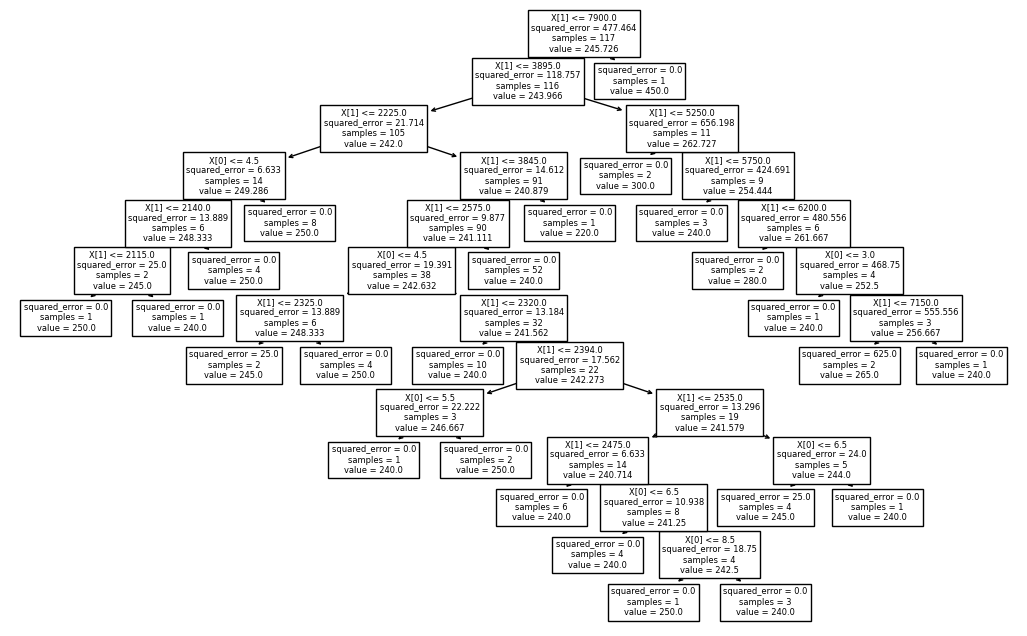

In [36]:
plt.figure(figsize=(13,8))
plot_tree(dtModel)